<a href="https://colab.research.google.com/github/avery32/group_project/blob/main/logisticregressionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[9716 9664]
 [ 596  725]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.50      0.65     19380
           1       0.07      0.55      0.12      1321

    accuracy                           0.50     20701
   macro avg       0.51      0.53      0.39     20701
weighted avg       0.89      0.50      0.62     20701



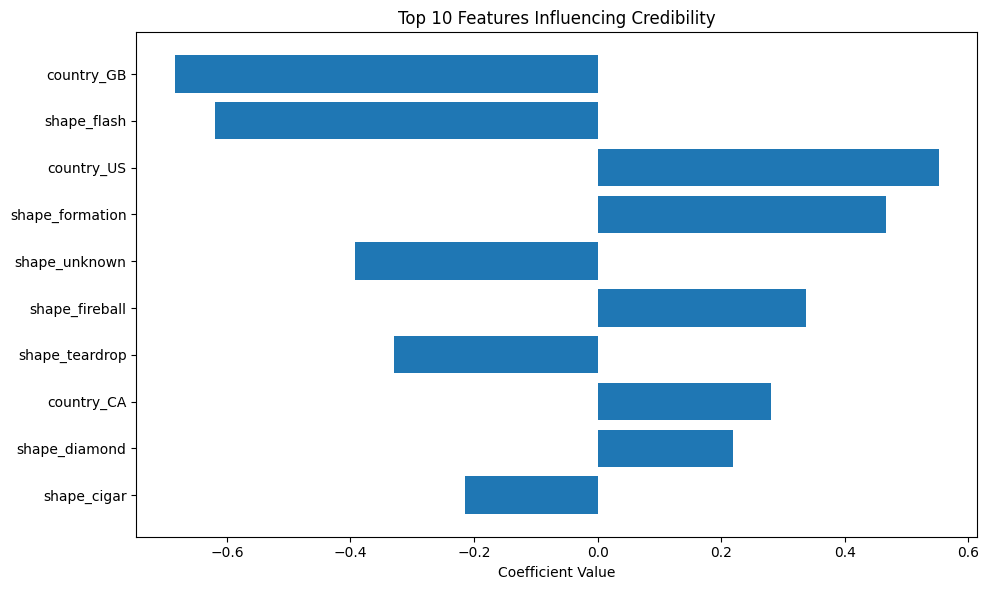

In [14]:
# Logistic Regression: Predicting UFO sighting credibility based on multiple reports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load dataset
df = pd.read_csv("/content/ufo_clean_data.csv")

# 2. Fix column names (remove accidental spaces)
df.columns = df.columns.str.strip()

# 3. Create new features from 'datetime'
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['month_num'] = df['datetime'].dt.month

# 4. Create 'credible' variable based on multiple sightings
# Combine city and date to find duplicate sightings
df['city_date'] = df['city'].astype(str) + '_' + df['datetime'].dt.date.astype(str)

# Count how many sightings per city-date
city_date_counts = df['city_date'].value_counts()

# If city-date occurred more than once, mark as credible
df['credible'] = df['city_date'].map(lambda x: 1 if city_date_counts[x] > 1 else 0)

# 5. One-hot encode 'shape' and 'country'
df = pd.get_dummies(df, columns=['shape', 'country'], drop_first=True)

# 6. Define feature columns
feature_cols = ['duration (seconds)', 'month_num'] + \
               [col for col in df.columns if col.startswith('shape_') or col.startswith('country_')]

# 7. Create X and y
X = df[feature_cols]
y = df['credible']

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Logistic Regression Model
model = LogisticRegression(max_iter=1000, class_weight='balanced')

model.fit(X_train, y_train)

# 10. Predictions
y_pred = model.predict(X_test)

# 11. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 12. Coefficients DataFrame
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute size
top_features = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)[:10]

# 13. Plot Top Influencing Features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title("Top 10 Features Influencing Credibility")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [4]:
print(df.columns.tolist())


['datetime', 'city', 'country', 'shape', 'duration (seconds)', 'date posted', 'latitude', 'longitude ', 'month', 'year', 'month_num', 'log_duration', 'date']
